<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Quiz 3 Review - Solutions

 _**Author:** Noelle B. (DSI-DEN)_

In [1]:
# FIRST!!!!
# import the data to use for the rest of this review
# run this cell
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston, load_breast_cancer

#load in breast cancer dataset for classification
breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
breast_cancer_df['type'] = breast_cancer.target

---
## 3.07 Model Workflow

### Gather, clean, explore and model a dataset from scratch.

**Q1.** How many missing values are in the breast cancer dataset?

In [2]:
# Answer:
breast_cancer_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
type                       0
dtype: int64

**Q2.** Visualize the correlation between the target variable (`type`) and the other features.

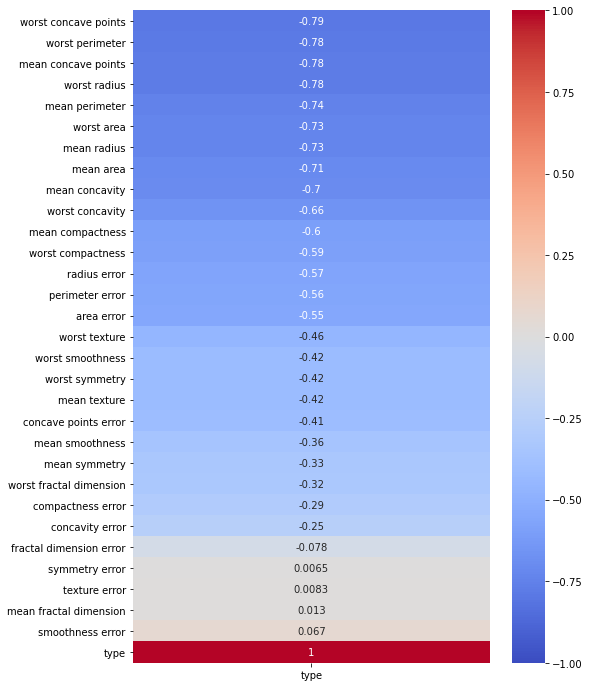

In [3]:
# Answer:
# code from global lesson 3.07
plt.figure(figsize=(8, 12))
sns.heatmap(breast_cancer_df.corr()[['type']].sort_values('type'),
            annot=True,
            cmap='coolwarm',
            vmin=-1, 
            vmax=1);

### Evaluate several models.

**Q3.** Below are 3 different regression models. Which one is best? Why?  
- Model 1: Training R^2 = 0.75, testing R^2 = 0.68
- Model 2: Training MSE = 1347, Testing MSE = 8963
- Model 3: Training RMSE = 0.23, Testing RMSE = 0.57

> **Answer:**  
There are several correct answers here. Model 2 seems to be the worst as it appears to be extremely overfit (testing MSE is way larger than training MSE). Models 1 and 3 seem to be decent scores and not too overfit, but it depends on the units for the target in model 3.

### Split data into testing and training sets using both train/test split and cross-validation and apply both techniques to score a model.

**Q4.** Split the breast cancer dataset into training and testing. Perform cross validation and find the accuracy of both the testing and training sets using a logistic regression model.

In [6]:
# Answer:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Define features and target
X = breast_cancer_df.drop(columns='type')
y = breast_cancer_df['type']

# Train test split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate and fit model
logr = LogisticRegression(solver='liblinear')
logr.fit(X_train, y_train)

# Get our scores
print('Cross val score:', cross_val_score(logr, X_train, y_train, cv=5).mean())
print('Training score:', logr.score(X_train, y_train))
print('Testing score:', logr.score(X_test, y_test))

Cross val score: 0.9482900136798905
Training score: 0.9577464788732394
Testing score: 0.965034965034965


---
## 4.01 Intro to Classification & Logistic Regression

### Distinguish between regression and classification problems.

**Q5.** Define Regression.

> **Answer:**  
Regression is the process of modeling when the target variable is continuous.

**Q6.** Define Classification.

> **Answer:**  
Classification is the process of modeling when the target variable can be put into groups (i.e. is categorical; in general, is discrete).

### Understand how logistic regression is similar to and different from linear regression.

**Q7.** What are the similarities between linear regression and logistic regression?

> **Answer:**  
Similarities:
- both predict continuous outcomes
- both are linear models
- logistic regression is linear regression using a logit link function

**Q8.** What are the differences between linear regression and logistic regression?

> **Answer:**  
Differences:
- Linear regression is used for regression, logistic for classification
- Linear regression predicts outputs between -infinity and +infinity, logistic regression predicts outcomes between 0 and 1

### Fit, generate predictions from, and evaluate a logistic regression model in sklearn.

**Q9.** Fit, generate predictions from, and evaluate using a logistic regression model using the breast cancer data. Find the accuracy, precision, and recall scores.

In [5]:
# Answer:
from sklearn.linear_model import LogisticRegression

X = breast_cancer_df.drop(columns='type')
y = breast_cancer_df['type']

# Normally, we would train test split here! Otherwise our model evaluation is...not so useful :/

In [6]:
logr = LogisticRegression()
logr.fit(X, y)
preds = logr.predict(X)

/Users/kelly/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
from sklearn.metrics import recall_score, precision_score

print('accuray:', logr.score(X, y))
print('recall:', recall_score(y, preds))
print('precision:', precision_score(y, preds))

accuray: 0.9472759226713533
recall: 0.9719887955182073
precision: 0.9455040871934605


### Understand how to interpret the coefficients of logistic regression.

**Q10.** Interpret the following coefficient of the logistic regression model that predicts the type of breast cancer:

| Feature | Coefficient |
| --- | --- |
| mean radius | 2.08 |

> **Answer:**  
Every one unit increase in the mean radius of a tumor, the chances of the tumor being malignant is about e^2.08 = 8.004 times as likely.

### Know the benefits of logistic regression as a classifier.

**Q11.** What are some benefits of logistic regression?

> **Answer:** (from global lesson 4.01)   
- Logistic regression is a classification algorithm that shares similar properties to linear regression.
- The coefficients in a logistic regression model are interpretable. (They represent the change in log-odds caused by the input variables.)
- Logistic regression is a very fast model to fit and generate predictions from.
- It is by far the most common classification algorithm.

---
## 4.02 k-Nearest Neighbors

### Understand the intuition behind the KNN algorithm

**Q12.** Describe how the kNN algorithm works.

>**Answer:**  
The k-nearest neighbors algorithm works as follows:  
1. Choose a number for k (number of neighbors)
2. Data points are assigned based on their k-nearest neighbors (majority vote for classification, mean of neighbors for regression)

### Describe the Bias / Variance tradeoff using hyper-parameters of KNN

**Q13.** What are ways to adjust the hyper-parameters of kNN to increase bias?

> **Answer:**  
Increasing the value of k will increase bias in the model.

**Q14.** What are ways to adjust the hyper-parameters of kNN to increase variance?

> **Answer:**  
Decreasing the value of k will increase variance in the model.

### Implement KNN with sklearn

**Q15.** Implement a kNN algorithm on the breast cancer dataset. Evaluate the model using accuracy.

In [8]:
# Answer:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

X = breast_cancer_df.drop(columns='type')
y = breast_cancer_df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [9]:
knn = KNeighborsClassifier()
cross_val_score(knn, X_train_sc, y_train, cv=10).mean()

0.9648309178743961

In [10]:
knn.fit(X_train_sc, y_train)
knn.score(X_train_sc, y_train)

0.9736263736263736

In [11]:
knn.score(X_test_sc, y_test)

0.956140350877193

---
## 4.03 Classification Metrics I

### Define true positives, true negatives, false positives, false negatives.

**Q16.** Define `true positives`.

>**Answer:**   
Predicted positive that were actually positive.

**Q17.** Define `true negatives`.

> **Answer:**  
Predicted negative that were actually negative.

**Q18.** Define `false positives`.

> **Answer:**  
Predicted positive but were actually negative.

**Q19.** Define `false negatives`.

>**Answer:**  
Predicted negative but were actually positive.

### Construct a confusion matrix.

**Q20.** You are trying to predict whether or not a person has a dog. Of the 100 people you sample, 87 of them have a dog. You predicted 68 of them have dogs, 60 of those were correct. Construct a confusion matrix for this scenario.

> **Answer:**  

| | Actual Positive | Actual Negative |
| --- | --- | --- |
| Predicted Positive | 60 | 8 |
| Predicted Negative | 27 | 5 |

In [12]:
# BONUS: build a confusion matrix for your KNN model above 
from sklearn.metrics import confusion_matrix

y_preds_test = knn.predict(X_test_sc)

cm = confusion_matrix(y_test, y_preds_test)
tn, fp, fn, tp = cm.ravel()

pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,39,3
Actual Positive,2,70


### Calculate accuracy, misclassification rate, sensitivity, specificity, and precision.

**Q21.** Given the following confusion matrix, calculate the accuracy:

| | Actual Positive | Actual Negative |
| --- | --- | --- |
| Predicted Positive | 150 | 14 |
| Predicted Negative | 21 | 87 |

>**Answer:**  
Accuracy = All correct / Total  
= (150+87)/(150+87+21+14)  
= 237/272  
= 87.13%

**Q22.** Given the following confusion matrix, calculate the misclassification rate:

| | Actual Positive | Actual Negative |
| --- | --- | --- |
| Predicted Positive | 150 | 14 |
| Predicted Negative | 21 | 87 |

> **Answer:**  
Misclassification rate = 1 - Accuracy  
= 1 - 0.8713  
= 12.87%

**Q23.** Given the following confusion matrix, calculate the sensitivity:

| | Actual Positive | Actual Negative |
| --- | --- | --- |
| Predicted Positive | 150 | 14 |
| Predicted Negative | 21 | 87 |

> **Answer:**  
Sensitivity = true positives / all positives  
= 150/(150+21)  
= 150/171  
= 87.72%

**Q24.** Given the following confusion matrix, calculate the specificity:

| | Actual Positive | Actual Negative |
| --- | --- | --- |
| Predicted Positive | 150 | 14 |
| Predicted Negative | 21 | 87 |

> **Answer:**  
Specificity = true negatives / all negatives  
= 87/(87+14)  
= 87/101  
= 86.14%

**Q25.** Given the following confusion matrix, calculate the precision:

| | Actual Positive | Actual Negative |
| --- | --- | --- |
| Predicted Positive | 150 | 14 |
| Predicted Negative | 21 | 87 |

> **Answer:**  
Precision = true positives / predicted positives  
= 150/(150+14)  
= 150/164  
= 91.46%

---
## 4.04 Classification Metrics II

### Describe the inverse relationship between sensitivity and specificity.

**Q26.** Define sensitivity.

> **Answer:**  
Sensitivity is the percentage of positives that the model correctly identified.

**Q27.** Define specificity.

> **Answer:**  
Specificity is the percentage of negatives that the model correctly identified.

### Understand how AUC ROC is calculated and interpret AUC ROC.

**Q28.** What is the AUC ROC?

> **Answer:**  
The AUC ROC is the area under the curve of the ROC. This plots the true positive rate vs. the false positive rate and shows how well separated your classes are.

### Describe methods for handling unbalanced classes.

**Q29.** What are some methods for handling unbalanced classes?

> **Answer:**  
(from global lesson 4.04)  
- Weighting observations. Some models allow the weighting of classes such as linear and logistic regression, Naive Bayes, Random Forests, SVMs, etc.
- Stratified cross-validation. If we use $k$-fold cross-validation entirely randomly, we may run into issues where some of our folds have no observations from the minority class. By stratifying on our output variable with unbalanced classes during cross-validation, we protect ourselves from this situation and ensure that our estimate of our model performance has lower variance.
- Changing threshold for classification. By adjusting our classification threshold, we might find a better fit for our particular use-case. We performed this operation earlier by manually changing our predicted labels by choosing a new threshold from the predicted probability.
- Bias correction. Gary King wrote a great whitepaper on this topic. This is a rigorous approach and while provide good results, as data scientists we often prefer "easier" methods to implement.
- Purposefully optimizing evaluation metrics. We might also consider optimizing our model for a specific metric such as precision, recall by class, ROC AUC.
- Bootstrapping

---
## 4.05 Regularization

### Describe what a loss function is.

**Q30.** What is a loss function?

> **Answer:**  
A loss function is the function that defines how we make decisions for our optimal model. In linear regression, this is the MSE, the value that we are trying to minimize.

### Define regularization.

**Q31.** What is regularization?

> **Answer:**  
Regularization is the process of adding a penalty to your loss function in order to reduce variance in the model.

### Describe and differentiate LASSO and Ridge regularization.

**Q32.** What is the difference between LASSO and Ridge regularization?

> **Answer:**  
LASSO adds an l1-penalty and can zero out coefficients that are less important to the model. Ridge adds an l2-penalty.

### Understand how regularization affects the bias-variance tradeoff and implement LASSO regression and Ridge regression.

**Q33.** How does regularization affect the bias-variance tradeoff?

> **Answer:**  
Regularization adds bias to the model to reduce variance. It can be used when the model is overfit.

---
## 4.06 Hyperparameters, Gridsearch, and Pipelines

### Describe what the terms hyperparameters, GridSearch, and pipeline mean.

**Q34.** Define `hyperparameter`.

> **Answer:**  
(from global lesson 4.06)  
A hyperparameter is a quantity of a model that we can adjust to fine-tune and improve our model.  
Examples:  
- What value of $k$ do we select?
- What distance metric do we select?
- Do we use LASSO or Ridge regularization?
- What value of $\alpha$ or $C$ do we use?

**Q35.** Define `GridSearch`.

> **Answer:**  
(from global lesson 4.06)  
Gridsearch is the process of searching for the optimal set of hyperparameters. GridSearching gets its name from the fact that we are searching over a "grid" of hyperparameters. For example, imagine the n_neighbors hyperparameters as the columns and distances as the rows. This makes a grid. We check the accuracy for all combinations of hyperparameters on the grid.

**Q36.** Define `pipeline`.

> **Answer:**  
(from global lesson 4.06)  
Pipelines will allow us to do two things:
- Chain many transformers together before ending in an estimator.
- Allow us to GridSearch over a transformer's hyperparameters.

### Apply sklearn's GridSearchCV object & use attributes of the GridSearch object.

**Q37.** Use sklearn's `GridSearchCV` to find the best hyperparameters for a kNN model given the following hyperparameter dictionary. View the best hyperparameters.

In [13]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = breast_cancer_df.drop(columns='type')
y = breast_cancer_df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

knn_params = {
    'n_neighbors': range(1, 13, 2),
    'metric': ['euclidean', 'manhattan']
}

In [14]:
# Answer
knn_gridsearch = GridSearchCV(KNeighborsClassifier(), 
                              knn_params, 
                              cv=5, 
                              verbose=1)

knn_gridsearch.fit(X_train, y_train)

print('Best params:', knn_gridsearch.best_params_)

best_knn = knn_gridsearch.best_estimator_

print('test score:', best_knn.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params: {'metric': 'manhattan', 'n_neighbors': 5}
test score: 0.9298245614035088


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.5s finished


### Describe the pitfalls of searching large hyperparameter spaces.

**Q38.** What are the pitfalls of searching large hyperparameter spaces?

> **Answer:**  
This could take forever and may only return marginal increases in model quality.